In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

distribution1 = np.random.multivariate_normal(mean_01, cov_01,500)
distribution2 = np.random.multivariate_normal(mean_02, cov_02,500)

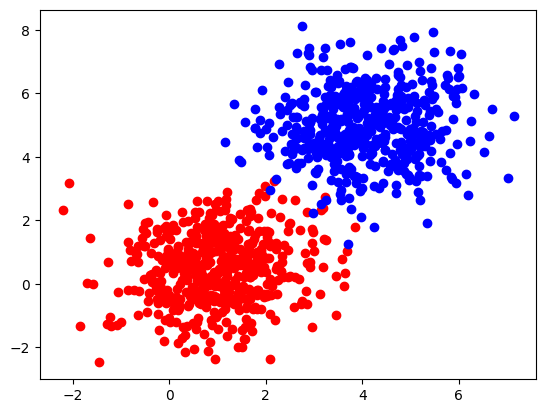

In [3]:
plt.scatter(distribution1[:,0], distribution1[:,1], color='red')
plt.scatter(distribution2[:,0], distribution2[:,1],color='blue')
plt.show()

In [4]:
combined_data = np.zeros((1000,3))
combined_data[:500,:2] = distribution1
combined_data[500:,:2] = distribution2

combined_data[:500,-1] = 1.0


In [5]:
np.random.shuffle(combined_data)
print(combined_data)

[[ 4.27316535  3.69974179  0.        ]
 [ 3.35746692  3.99482768  0.        ]
 [ 4.9531323   4.19206975  0.        ]
 ...
 [ 2.22354081 -0.30786926  1.        ]
 [ 3.24859329  4.77911427  0.        ]
 [ 2.73465383  5.65093768  0.        ]]


In [6]:
split_size = int(0.8*combined_data.shape[0])
X_train = combined_data[:split_size,:-1]
X_test = combined_data[split_size:,:-1]

Y_train = combined_data[:split_size,-1]
Y_test = combined_data[split_size:,-1]

In [7]:
X_train.shape

(800, 2)

Normalisation


In [8]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train-X_mean)/-X_std

In [9]:

X_train = (X_test-X_mean)/-X_std

In [10]:
X_train.mean(axis=0)

array([-0.00270004, -0.0446361 ])

ValueError: 'c' argument has 800 elements, which is inconsistent with 'x' and 'y' with size 200.

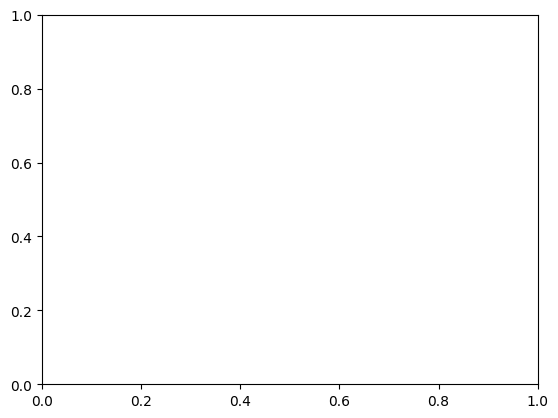

In [11]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)

Implrmentation

In [12]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))


def error(X,y,theta):
    hi = hypothesis(X,theta)
    e = -1*np.mean((y*np.log(hi)) + ((1-y)*np.log(1-hi)))
    return e

def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = np.dot(X.T,(y-hi))
    return grad/X.shape[0]

def gradient_decenet(X,y,lr=0.5,max_steps=500):
    theta = np.zeros((X.shape[1],1))
    error_list = []
    for i in range(max_steps):
        err = error(X,y,theta)
        error_list.append(err)
        grad = gradient(X,y,theta)
        theta = theta+lr*grad

    return (theta, error_list)





In [13]:
X_with_bias = np.hstack((np.ones((X_train.shape[0],1)), X_train))
print(X_with_bias)


[[ 1.          0.00866435  0.32605076]
 [ 1.         -0.0677086  -1.83413363]
 [ 1.         -1.78604259 -0.56535978]
 [ 1.          0.26864936  1.09337527]
 [ 1.         -1.37392187 -1.2215207 ]
 [ 1.         -0.70567709 -0.66771522]
 [ 1.         -1.21031877 -1.56240429]
 [ 1.          0.46110717  1.01345537]
 [ 1.          1.13612607  1.24411154]
 [ 1.         -1.42608745 -0.54251716]
 [ 1.         -0.65189029 -1.26742956]
 [ 1.          2.04478756  1.51451658]
 [ 1.         -0.11716782  1.35034316]
 [ 1.         -1.22580516 -0.60448102]
 [ 1.          1.49725998  1.17065453]
 [ 1.         -0.67576636 -1.40106052]
 [ 1.          0.11925307  0.92630585]
 [ 1.         -1.96686953 -0.29708582]
 [ 1.          1.11845573  0.83577091]
 [ 1.          0.60223137  1.90081065]
 [ 1.         -0.89546872 -1.27331678]
 [ 1.          0.81200937  0.9444731 ]
 [ 1.         -0.69381334 -0.79161637]
 [ 1.         -1.01052317 -0.72887191]
 [ 1.          2.07965303  1.6019663 ]
 [ 1.          1.0847421 

In [14]:
# Y_train = Y_train.reshape((-1,1))
theta,error_list  = gradient_decenet(X_with_bias,Y_train)

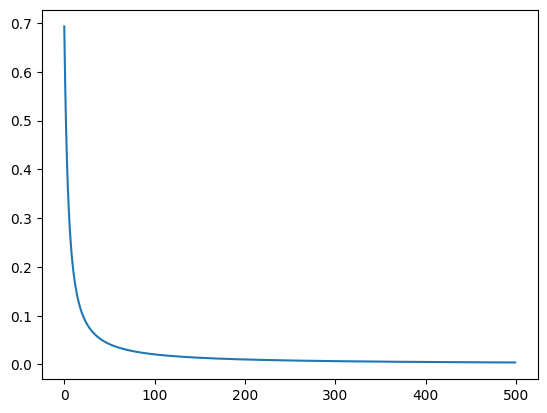

In [15]:
plt.plot(error_list)

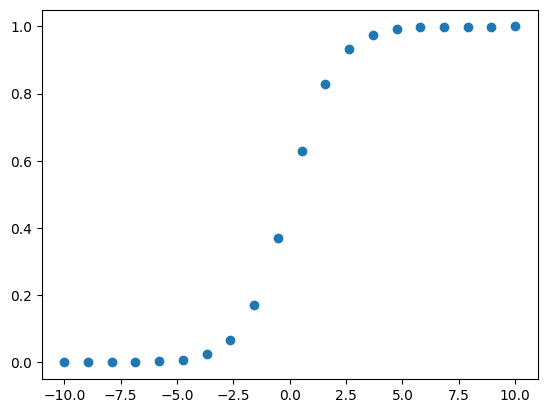

In [26]:
a = np.linspace(-10,10,20)
plt.scatter(a,sigmoid(a))